In [1]:
# !pip install stim~=1.14
import stim
!pip install pymatching~=2.0
import pymatching

ImportError: Error importing numpy: you should not try to import numpy from
        its source directory; please exit the numpy source tree, and relaunch
        your python interpreter from there.

In [5]:
from stim_baconshor import *

ImportError: Error importing numpy: you should not try to import numpy from
        its source directory; please exit the numpy source tree, and relaunch
        your python interpreter from there.

In [3]:
print(stim.__version__)

1.15.0


In [6]:
circuit = stim.Circuit("""
R 0 1 2 3 4 5 6 7 8 
R 9 10 11 12 13 14 15 16 17 18 19 20
DEPOLARIZE1(0.001) 0 1 2 3 4 5 6 7 8

Y_ERROR(0.9) 0                                     
CX 0 9
CX 1 9
M 9
                       
CX 3 10
CX 4 10
M 10
                       
CX 6 11
CX 7 11
M 11
                       
DETECTOR(0) rec[-1] rec[-2] rec[-3]

CX 1 12
CX 2 12
M 12
                       
CX 4 13
CX 5 13
M 13
                       
CX 7 14
CX 8 14
M 14
                       
DETECTOR(1) rec[-1] rec[-2] rec[-3]
                
H 0 3 6 1 4 7 2 5 8
H 15 16 17 18 19 20 
                       
CX 15 0
CX 15 3
H 15                       
M 15
                       
CX 16 1
CX 16 4
H 16
M 16
                       
CX 17 2
CX 17 5
H 17
M 17
                       
DETECTOR(2) rec[-1] rec[-2] rec[-3]

CX 18 3
CX 18 6
H 18
M 18
                       
CX 19 4
CX 19 7
H 19
M 19
                       
CX 20 5
CX 20 8
H 20
M 20
                       
DETECTOR(3) rec[-1] rec[-2] rec[-3]
                       
          
""")

In [30]:
circuit.diagram()

q0: -R-DEPOLARIZE1(0.001)-Y_ERROR(0.9)-@-----------------------------------------------------------------------------------------------H-----------------------------------X--------------------------------------------------------------------------------------------------------------------------------------------------
                                        |                                                                                                                                   |
 q1: -R-DEPOLARIZE1(0.001)--------------|-@---------------------------------------------------------------@-----------------------------H-----------------------------------|--------------X-----------------------------------------------------------------------------------------------------------------------------------
                                        | |                                                               |                                                                 |              |
 q2: -R-DEPOLARIZE1(0.001)--------------|-|---------------------------------------------------------------|-@---------------------------H-----------------------------------|--------------|--------------X--------------------------------------------------------------------------------------------------------------------
                                        | |                                                               | |                                                               |              |              |
 q3: -R-DEPOLARIZE1(0.001)--------------|-|----------@----------------------------------------------------|-|---------------------------H-----------------------------------|-X------------|--------------|-----------------------------------------X--------------------------------------------------------------------------
                                        | |          |                                                    | |                                                               | |            |              |                                         |
 q4: -R-DEPOLARIZE1(0.001)--------------|-|----------|-@--------------------------------------------------|-|----------@----------------H-----------------------------------|-|------------|-X------------|-----------------------------------------|--------------X-----------------------------------------------------------
                                        | |          | |                                                  | |          |                                                    | |            | |            |                                         |              |
 q5: -R-DEPOLARIZE1(0.001)--------------|-|----------|-|--------------------------------------------------|-|----------|-@--------------H-----------------------------------|-|------------|-|------------|-X---------------------------------------|--------------|---------------X-------------------------------------------
                                        | |          | |                                                  | |          | |                                                  | |            | |            | |                                       |              |               |
 q6: -R-DEPOLARIZE1(0.001)--------------|-|----------|-|----------@---------------------------------------|-|----------|-|--------------H-----------------------------------|-|------------|-|------------|-|---------------------------------------|-X------------|---------------|-------------------------------------------
                                        | |          | |          |                                       | |          | |                                                  | |            | |            | |                                       | |            |               |
 q7: -R-DEPOLARIZE1(0.001)--------------|-|----------|-|----------|-@-------------------------------------|-|----------|-|----------@

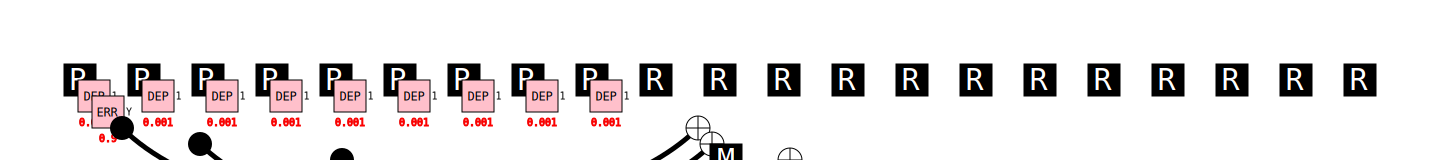

In [7]:
circuit.diagram('timeslice-svg')

In [33]:
sampler = circuit.compile_detector_sampler()
print(sampler.sample(shots=5))

[[ True False  True False]
 [ True False  True False]
 [ True False  True False]
 [False False False False]
 [ True False  True False]]


In [3]:
circuit = stim.Circuit("""
R 0 1 2 3 4 5 6 7 8 
R 9 10 11 12 13 14 15 16 17 18 19 20
DEPOLARIZE1(0.001) 0 1 2 3 4 5 6 7 8

Y_ERROR(0.4) 0                                     
CX 0 9
CX 1 9
M 9
                       
CX 3 10
CX 4 10
M 10
                       
CX 6 11
CX 7 11
M 11
                       
DETECTOR(0) rec[-1] rec[-2] rec[-3]

CX 1 12
CX 2 12
M 12
                       
CX 4 13
CX 5 13
M 13
                       
CX 7 14
CX 8 14
M 14
                       
DETECTOR(1) rec[-1] rec[-2] rec[-3]
                
H 0 3 6 1 4 7 2 5 8
H 15 16 17 18 19 20 
                       
CX 15 0
CX 15 3
H 15                       
M 15
                       
CX 16 1
CX 16 4
H 16
M 16
                       
CX 17 2
CX 17 5
H 17
M 17
                       
DETECTOR(2) rec[-1] rec[-2] rec[-3]

CX 18 3
CX 18 6
H 18
M 18
                       
CX 19 4
CX 19 7
H 19
M 19
                       
CX 20 5
CX 20 8
H 20
M 20
                       
DETECTOR(3) rec[-1] rec[-2] rec[-3]
                       
          
""")

In [4]:
sampler = circuit.compile_detector_sampler()
samples = sampler.sample(shots=5)
print(samples)

[[False False False False]
 [False False False False]
 [ True False  True False]
 [ True False  True False]
 [False False False False]]


In [5]:
convert_stab_measurements(samples)

[[1, 1, 1, 1], [1, 1, 1, 1], [-1, 1, -1, 1], [-1, 1, -1, 1], [1, 1, 1, 1]]

In [3]:
test_circuit = construct_circuit(5, 0, [])

In [4]:
print(test_circuit)

R 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
R 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64

Y_ERROR(0)

CX 0 25
CX 1 25
M 25

CX 5 26
CX 6 26
M 26

CX 10 27
CX 11 27
M 27

CX 15 28
CX 16 28
M 28

CX 20 29
CX 21 29
M 29

DETECTOR(0) rec[-1] rec[-2] rec[-3] rec[-4] rec[-5]

CX 1 30
CX 2 30
M 30

CX 6 31
CX 7 31
M 31

CX 11 32
CX 12 32
M 32

CX 16 33
CX 17 33
M 33

CX 21 34
CX 22 34
M 34

DETECTOR(1) rec[-1] rec[-2] rec[-3] rec[-4] rec[-5]

CX 2 35
CX 3 35
M 35

CX 7 36
CX 8 36
M 36

CX 12 37
CX 13 37
M 37

CX 17 38
CX 18 38
M 38

CX 22 39
CX 23 39
M 39

DETECTOR(2) rec[-1] rec[-2] rec[-3] rec[-4] rec[-5]

CX 3 40
CX 4 40
M 40

CX 8 41
CX 9 41
M 41

CX 13 42
CX 14 42
M 42

CX 18 43
CX 19 43
M 43

CX 23 44
CX 24 44
M 44

DETECTOR(3) rec[-1] rec[-2] rec[-3] rec[-4] rec[-5]

H 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
H 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62

In [7]:


circuit = stim.Circuit('''
QUBIT_COORDS(0, 0) 0
QUBIT_COORDS(1, 0) 1
QUBIT_COORDS(2, 0) 2
QUBIT_COORDS(0, 1) 3
QUBIT_COORDS(1, 1) 4
QUBIT_COORDS(2, 1) 5
QUBIT_COORDS(0, 2) 6
QUBIT_COORDS(1, 2) 7
QUBIT_COORDS(2, 2) 8

QUBIT_COORDS(0.5, 0) 9
QUBIT_COORDS(0.5, 1) 10
QUBIT_COORDS(0.5, 2) 11
QUBIT_COORDS(1.5, 0) 12
QUBIT_COORDS(1.5, 1) 13
QUBIT_COORDS(1.5, 2) 14

QUBIT_COORDS(0, 0.5) 15
QUBIT_COORDS(1, 0.5) 16
QUBIT_COORDS(2, 0.5) 17
QUBIT_COORDS(0, 1.5) 18
QUBIT_COORDS(1, 1.5) 19
QUBIT_COORDS(2, 1.5) 20


R 0 1 2 3 4 5 6 7 8
R 9 10 11 12 13 14 15 16 17 18 19 20

DEPOLARIZE1(0.001) 0 1 2 3 4 5 6 7 8

CX 0 9
CX 1 9
M 9

CX 3 10
CX 4 10
M 10

CX 6 11
CX 7 11
M 11

DETECTOR(0) rec[-1] rec[-2] rec[-3]

CX 1 12
CX 2 12
M 12

CX 4 13
CX 5 13
M 13

CX 7 14
CX 8 14
M 14

DETECTOR(1) rec[-1] rec[-2] rec[-3]

H 0 1 2 3 4 5 6 7 8
H 15 16 17 18 19 20

CX 15 0
CX 15 3
H 15
M 15

CX 16 1
CX 16 4
H 16
M 16

CX 17 2
CX 17 5
H 17
M 17

DETECTOR(2) rec[-1] rec[-2] rec[-3]

CX 18 3
CX 18 6
H 18
M 18

CX 19 4
CX 19 7
H 19
M 19

CX 20 5
CX 20 8
H 20
M 20

DETECTOR(3) rec[-1] rec[-2] rec[-3]
''')


In [ ]:
circuit.diagram('timeslice-svg')

q0: -QUBIT_COORDS(0,0)---R-DEPOLARIZE1(0.001)-@-----------------------------------------------------------------------------------------------H-----------------------------------X--------------------------------------------------------------------------------------------------------------------------------------------------
                                               |                                                                                                                                   |
 q1: -QUBIT_COORDS(1,0)---R-DEPOLARIZE1(0.001)-|-@---------------------------------------------------------------@-----------------------------H-----------------------------------|--------------X-----------------------------------------------------------------------------------------------------------------------------------
                                               | |                                                               |                                                                 |              |
 q2: -QUBIT_COORDS(2,0)---R-DEPOLARIZE1(0.001)-|-|---------------------------------------------------------------|-@---------------------------H-----------------------------------|--------------|--------------X--------------------------------------------------------------------------------------------------------------------
                                               | |                                                               | |                                                               |              |              |
 q3: -QUBIT_COORDS(0,1)---R-DEPOLARIZE1(0.001)-|-|----------@----------------------------------------------------|-|---------------------------H-----------------------------------|-X------------|--------------|-----------------------------------------X--------------------------------------------------------------------------
                                               | |          |                                                    | |                                                               | |            |              |                                         |
 q4: -QUBIT_COORDS(1,1)---R-DEPOLARIZE1(0.001)-|-|----------|-@--------------------------------------------------|-|----------@----------------H-----------------------------------|-|------------|-X------------|-----------------------------------------|--------------X-----------------------------------------------------------
                                               | |          | |                                                  | |          |                                                    | |            | |            |                                         |              |
 q5: -QUBIT_COORDS(2,1)---R-DEPOLARIZE1(0.001)-|-|----------|-|--------------------------------------------------|-|----------|-@--------------H-----------------------------------|-|------------|-|------------|-X---------------------------------------|--------------|---------------X-------------------------------------------
                                               | |          | |                                                  | |          | |                                                  | |            | |            | |                                       |              |               |
 q6: -QUBIT_COORDS(0,2)---R-DEPOLARIZE1(0.001)-|-|----------|-|----------@---------------------------------------|-|----------|-|--------------H-----------------------------------|-|------------|-|------------|-|---------------------------------------|-X------------|---------------|-------------------------------------------
                                               | |          | |          |                                       | |          | |                                                  | |            | |            | |                                       | |            |               |
 q7: -QUBIT_COORDS(1,2)---R-DEPOLAR

In [11]:
svg = circuit.diagram('timeslice-svg')

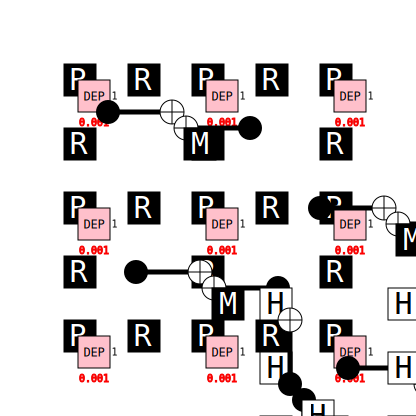

In [13]:
svg

In [5]:
count = count_logical_error(circuit, 1)

NameError: name 'count_logical_error' is not defined